<h1/>Slide 28<h1>

Kiểm tra một số có phải là bội số của 4 hay không

In [ ]:
def check_boisoboiso(N):
    if N > 0 and N % 4 == 0:
        return True
    return False

N=int(input('Nhập số để kiểm tra bội số của 4'))
if check_boisoboiso(N):
    print(f"{N} là bội số của 4.")
else:
    print(f"{N} không phải là bội số của 4.")

8 là bội số của 4.


Kiểm tra một số trong hệ nhị phân có đúng 3 bit bất
kỳ bằng 1.

In [45]:
def check_bit(number):
    number=bin(number)
    return number,number.count('1')


N=7
num_bit,count=check_bit(N)
print(f"Số {N} trong nhị phân: {num_bit}")
if count==3:
    print(f"Số {N} trong chuỗi nhị phân có đúng 3 số bit 1")
else:
    print(f"Số {N} trong chuỗi nhị phân không có đúng 3 số bit 1")
    

Số 7 trong nhị phân: 0b111
Số 7 trong chuỗi nhị phân có đúng 3 số bit 1


Kiểm tra số bit 1 chẵn hay lẻ của một số trong chuỗi nhị phânphân

In [8]:
def check_parity(number):
    count_ones = bin(number).count('1')  # Đếm số bit 1
    if count_ones % 2 == 0:
        return f"Số bit 1 cuả {number} trong hệ nhị phân là chẵn."
    else:
        return f"Số bit 1 của {number} trong hệ nhị phân là lẻ."

number = int(input("Nhập chuỗi nhị phân: "))
print(check_parity(number))


Số bit 1 cuả 5 trong hệ nhị phân là chẵn.


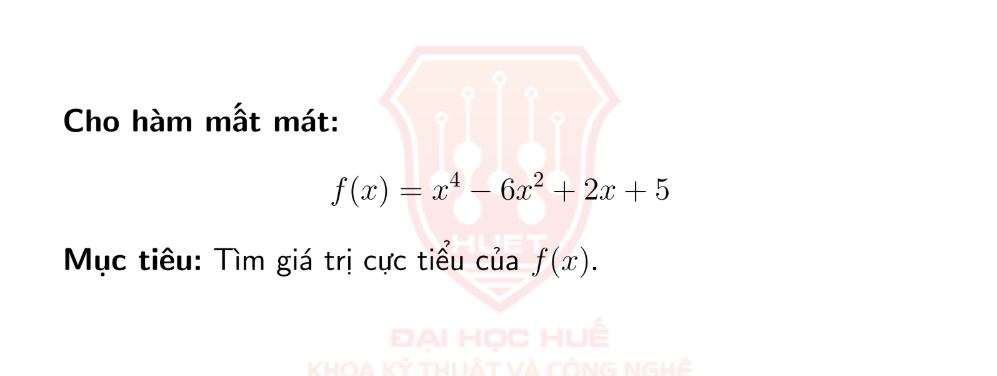

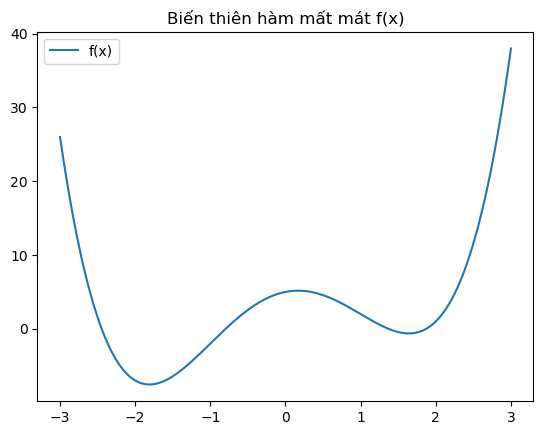

In [3]:
# hàm mất mát 
def f(x):
    return x**4 -6*x**2 +2*x +5

# đạo hàm hàm mất mátmát
def df(x):
    return 4*x**3 -12*x +2

import matplotlib.pyplot as plt ,numpy as np
x_range=np.linspace(-3,3,10000)
y_range=f(x_range)
plt.plot(x_range,y_range,label='f(x)')
plt.title('Biến thiên hàm mất mát f(x)')
plt.legend()

Sử dụng Gradient Descent

In [5]:
def gradient_descent(x_init,n_iter,learning_rate):    
    x=x_init
    for _ in range(n_iter):
        gd=df(x)
        x_new = x - learning_rate*gd
        # tránh lặp đi lặp lại nhiều nều khi kh có sự thay đổi lớn
        if  abs(x-x_new)<1e-6:
            break
        x=x_new
    return x

x1=gradient_descent(-3,10000,0.01)
x2=gradient_descent(3,10000,0.01)
print(f"Điểm cực tiểu 1: x ≈ {x1:.4f}, f(x) ≈ {f(x1):.4f}")
print(f"Điểm cực tiểu 2: x ≈ {x2:.4f}, f(x) ≈ {f(x2):.4f}")

Điểm cực tiểu 1: x ≈ -1.8100, f(x) ≈ -7.5438
Điểm cực tiểu 2: x ≈ 1.6418, f(x) ≈ -0.6237


Sử dụng Stochastic Gradient Descent (SGD)

In [6]:
def stochastic_gradient_descent(x_init,n_iter,learning_rate,noise):
    x=x_init
    for _ in range(n_iter):
        sgd=df(x)
        x_new = x - learning_rate*(sgd+noise)
        # tránh lặp đi lặp lại nhiều nều khi kh có sự thay đổi lớnlớn
        if  abs(x-x_new)<1e-6:
            break
        x=x_new
    return x_new
x1=stochastic_gradient_descent(-3,10000,0.01,0.25)
x2=stochastic_gradient_descent(3,10000,0.01,0.25)
print(f"Điểm cực tiểu 1: x ≈ {x1:.4f}, f(x) ≈ {f(x1):.4f}")
print(f"Điểm cực tiểu 2: x ≈ {x2:.4f}, f(x) ≈ {f(x2):.4f}")

Điểm cực tiểu 1: x ≈ -1.8191, f(x) ≈ -7.5426
Điểm cực tiểu 2: x ≈ 1.6293, f(x) ≈ -0.6221


Root Mean Square Propagation (RMSProp)

In [24]:
import math
def rmsprop(x_init,n_iter=10000,v_init=0,learning_rate=0.01,beta=0.9,epsilon=1e-8):    
    x=x_init
    v=v_init
    for _ in range(n_iter):
        rms=df(x)
        v_new=beta*v+(1-beta)*rms**2
        x_new = x - learning_rate*rms/(math.sqrt(v_new)+epsilon)
        # tránh nhảy qua nhảy về điểm hội tụ
        if  abs(x-x_new)<1e-6:
            break
        x=x_new
        v=v_new
    return x
x1=rmsprop(-3)
x2=rmsprop(3)
print(f"Điểm cực tiểu 1: x ≈ {x1:.4f}, f(x) ≈ {f(x1):.4f}")
print(f"Điểm cực tiểu 2: x ≈ {x2:.4f}, f(x) ≈ {f(x2):.4f}")

Điểm cực tiểu 1: x ≈ -1.8100, f(x) ≈ -7.5438
Điểm cực tiểu 2: x ≈ 1.6418, f(x) ≈ -0.6237


Adaptive Moment Estimation (Adam)

In [23]:
def adam(x_init, n_iter=10000, m_init=0, v_init=0, learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
    x = x_init
    m = m_init
    v = v_init
    t = 0  # Đếm số lần cập nhật

    for _ in range(n_iter):
        t += 1
        grad = df(x)  # f'(x)

        # Cập nhật m và v
        m = beta_1 * m + (1 - beta_1) * grad
        v = beta_2 * v + (1 - beta_2) * grad ** 2

        # Hiệu chỉnh bias
        m_hat = m / (1 - beta_1 ** t)
        v_hat = v / (1 - beta_2 ** t)

        # Cập nhật x
        x_new = x - learning_rate * m_hat / (math.sqrt(v_hat) + epsilon)

        if abs(x - x_new) < 1e-6:
            break
        
        x = x_new 
    return x

x_1 = adam(-3)
x_2 = adam(3)
print(f"Điểm cực tiểu 1: x = {x1:.4f}, f(x) = {f(x1):.4f}")
print(f"Điểm cực tiểu 2: x = {x2:.4f}, f(x) = {f(x2):.4f}")


Điểm cực tiểu 1: x = -1.8100, f(x) = -7.5438
Điểm cực tiểu 2: x = 1.6418, f(x) = -0.6237
